## steps to perform before building model

-- Collecting Data

-- Analyzing Data

-- Data Wrangling

-- Train and Test

-- Accuracy check

# Loading Library  

In [6]:
import pandas as pd   # Pandas is used for data analysis
import numpy as np    # numpy is used for numerical python it is used to perform scientific computing
import seaborn as sns  # seaborn is used for visualization 
import matplotlib.pyplot as plt     # matplotlib is used for visualization
%matplotlib inline          
import math
from warnings import filterwarnings
filterwarnings('ignore')

In [49]:
# Loading data  (Collecting Data)
titanic=pd.read_csv('titanic.csv')
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<AxesSubplot:xlabel='Survived', ylabel='count'>

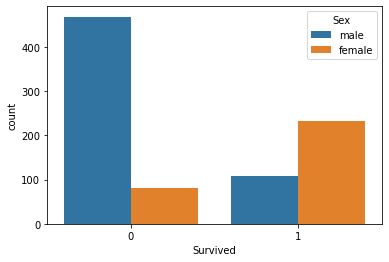

In [15]:
# Analyzing Data

#1. will plot the graph over sex who survived more male or female

sns.countplot('Survived',hue='Sex',data=titanic)

We can clearly see over here female survived more when compared to male

<AxesSubplot:xlabel='Survived', ylabel='count'>

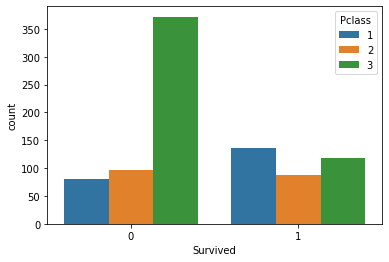

In [16]:
#2. will plot the graph on survived over Pclass who survived more 1st class,2nd class,3rd class ?

sns.countplot('Survived',hue='Pclass',data=titanic)

we can clearly see over here the people who took 1st class ticket are survived more when compared with other class

<AxesSubplot:xlabel='Age', ylabel='Density'>

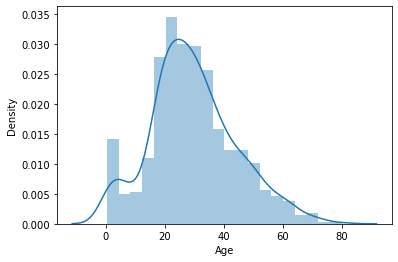

In [20]:
# will see how the age is distributed 
sns.distplot(titanic.Age)

By seeing the graph you can conclude that the age between 20 to 40 has higest passenger

In [21]:
# NOw will perform data wrangling (cleaning the data)
# will check for null values

titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

<AxesSubplot:>

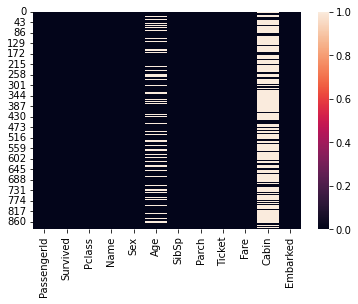

In [23]:
# now will visualize the null values 
sns.heatmap(titanic.isnull())

In [50]:
# will drop the unwanted features
titanic.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [53]:
titanic.drop(['Cabin','Name','PassengerId'],axis=1,inplace=True)

In [54]:
titanic.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C


In [55]:
# will convert the string format data to numeric 

sex=pd.get_dummies(titanic.Sex,drop_first=True)
sex.head(2)

,male
0,1
1,0


In [56]:
Embarked=pd.get_dummies(titanic.Embarked,drop_first=True)
Embarked.head(2)

,Q,S
0,0,1
1,0,0


In [57]:
Pclass=pd.get_dummies(titanic.Pclass,drop_first=True)
Pclass.head(2)

,2,3
0,0,1
1,0,0


In [67]:
new_titanic=pd.concat([titanic,sex,Embarked,Pclass],axis=1)

In [68]:
new_titanic

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,male,Q,S,2,3
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S,1,0,1,0,1
1,1,1,female,38.0,1,0,PC 17599,71.2833,C,0,0,0,0,0
2,1,3,female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,0,1,0,1
3,1,1,female,35.0,1,0,113803,53.1000,S,0,0,1,0,0
4,0,3,male,35.0,0,0,373450,8.0500,S,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,0,2,male,27.0,0,0,211536,13.0000,S,1,0,1,1,0
887,1,1,female,19.0,0,0,112053,30.0000,S,0,0,1,0,0
888,0,3,female,NaN,1,2,W./C. 6607,23.4500,S,0,0,1,0,1
889,1,1,male,26.0,0,0,111369,30.0000,C,1,0,0,0,0


In [69]:
new_titanic.drop(['Sex','Pclass','Ticket','Embarked'],axis=1,inplace=True)

In [70]:
new_titanic

,Survived,Age,SibSp,Parch,Fare,male,Q,S,2,3
0,0,22.0,1,0,7.2500,1,0,1,0,1
1,1,38.0,1,0,71.2833,0,0,0,0,0
2,1,26.0,0,0,7.9250,0,0,1,0,1
3,1,35.0,1,0,53.1000,0,0,1,0,0
4,0,35.0,0,0,8.0500,1,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...
886,0,27.0,0,0,13.0000,1,0,1,1,0
887,1,19.0,0,0,30.0000,0,0,1,0,0
888,0,NaN,1,2,23.4500,0,0,1,0,1
889,1,26.0,0,0,30.0000,1,0,0,0,0


In [82]:
new_titanic.dropna(inplace=True)

In [83]:
X=new_titanic.drop(['Survived'],axis=1)
y=new_titanic['Survived']

In [84]:
print(X)

      Age  SibSp  Parch     Fare  male  Q  S  2  3
0    22.0      1      0   7.2500     1  0  1  0  1
1    38.0      1      0  71.2833     0  0  0  0  0
2    26.0      0      0   7.9250     0  0  1  0  1
3    35.0      1      0  53.1000     0  0  1  0  0
4    35.0      0      0   8.0500     1  0  1  0  1
..    ...    ...    ...      ...   ... .. .. .. ..
885  39.0      0      5  29.1250     0  1  0  0  1
886  27.0      0      0  13.0000     1  0  1  1  0
887  19.0      0      0  30.0000     0  0  1  0  0
889  26.0      0      0  30.0000     1  0  0  0  0
890  32.0      0      0   7.7500     1  1  0  0  1

[714 rows x 9 columns]


In [85]:
print(y)

0      0
1      1
2      1
3      1
4      0
      ..
885    0
886    0
887    1
889    1
890    0
Name: Survived, Length: 714, dtype: int64


In [93]:
# now will build the model using this feature

from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=1)

In [94]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(X_train,y_train)

LogisticRegression()

In [95]:
y_pred=model.predict(X_test)

In [96]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test,y_pred)

array([[114,  20],
       [ 26,  55]], dtype=int64)

In [97]:
from sklearn.metrics import classification_report
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.81      0.85      0.83       134
           1       0.73      0.68      0.71        81

    accuracy                           0.79       215
   macro avg       0.77      0.76      0.77       215
weighted avg       0.78      0.79      0.78       215



In [100]:
from sklearn.metrics import accuracy_score

accuracy_score(y_test,y_pred)

0.786046511627907